In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
trip = pd.read_csv('data/trip.csv')
weather = pd.read_csv('data/weather.csv')

In [73]:
# Mover hora a su propia columna
trip['start_time'] = trip.loc[:,'start_date'].map(lambda s: s.split(' ')[1])
trip['hours_from_midnight'] = trip['start_time'].map(lambda s: float(s.split(':')[0]) + float(s.split(':')[1])/60)
trip.loc[:,'start_date'] = trip.loc[:,'start_date'].map(lambda s: s.split(' ')[0])
trip.loc[:,['start_date','start_time','hours_from_midnight']].head()

,start_date,start_time,hours_from_midnight
0,8/29/2013,14:13,14.216667
1,8/29/2013,14:42,14.700000
2,8/29/2013,10:16,10.266667
3,8/29/2013,11:29,11.483333
4,8/29/2013,12:02,12.033333


In [74]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [75]:
trip.zip_code.unique()

array(['94127', '95138', '97214', ..., '2400105', '1004004', '29609'], dtype=object)

Que onda? Los codigos postales no coinciden. Como obtengo el clima para cada viaje?

In [76]:
# COUNT NULLS
tmp = weather.drop('zip_code', axis=1).apply(lambda x: x.isnull())
tmp['zip_code'] = weather.zip_code
tmp.groupby('zip_code').sum()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
zip_code,,,,,,,,,,,,,,,,,,,,,
94041,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,639.0,0.0
94063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,412.0,0.0,0.0,639.0,0.0
94107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,574.0,0.0
94301,0.0,1.0,1.0,1.0,51.0,51.0,51.0,51.0,51.0,51.0,...,13.0,13.0,13.0,1.0,1.0,453.0,1.0,1.0,653.0,1.0
95113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,638.0,0.0


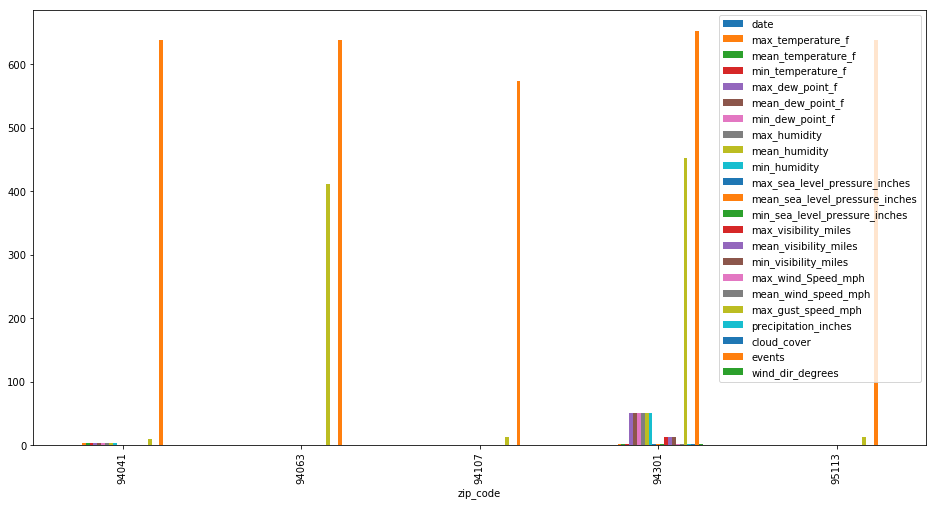

In [77]:
tmp.groupby('zip_code').sum().plot(kind='bar', figsize=(16,8))

Zip code 94107 has fewest nulls

In [78]:
curated_weather = weather[weather.zip_code == 94107]
del curated_weather['zip_code']
curated_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0


In [79]:
tmp = trip.merge(curated_weather, how='outer', left_on='start_date', right_on='date')
tmp.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,4576,63,8/29/2013,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
1,4607,70,8/29/2013,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
2,4130,71,8/29/2013,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
3,4251,77,8/29/2013,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
4,4299,83,8/29/2013,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0


In [81]:
def rush(x):
    if 7 <= x and x < 10: return 1  # morning rush
    if 16 <= x and x < 19: return 2 # afternoon rush
    return 0;
trip['rush'] = trip.hours_from_midnight.map(lambda x: rush(x))
trip.loc[:,['hours_from_midnight','rush']].sample(10)

,hours_from_midnight,rush
348686,8.733333,1
528975,9.800000,1
485029,7.433333,1
661985,8.016667,1
651243,8.116667,1
622035,20.316667,0
510206,16.050000,2
129090,14.233333,0
232046,7.166667,1
548320,18.833333,2


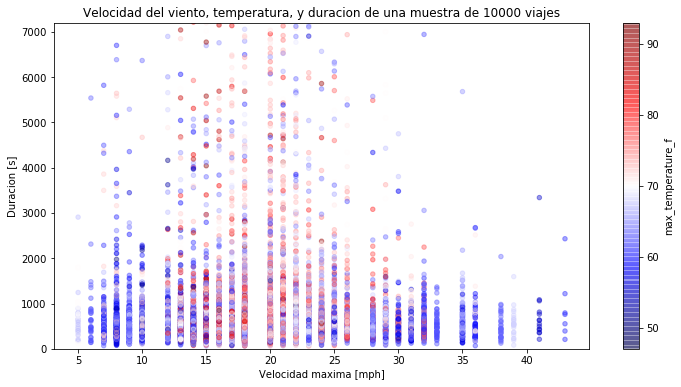

In [11]:
tmp.sample(20000).plot.scatter(x='max_wind_Speed_mph', y='duration',\
                c='max_temperature_f', colormap='seismic', alpha=0.4,\
                figsize=(12,6), colorbar=True, ylim=[0,7200], sharex=False)
plt.xlabel("Velocidad maxima [mph]")
plt.ylabel("Duracion [s]")
plt.title("Velocidad del viento, temperatura, y duracion de una muestra de 10000 viajes")

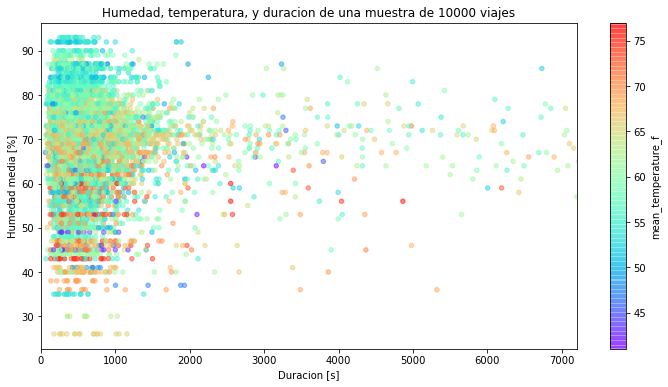

In [19]:
tmp.sample(10000).plot.scatter(x='duration', y='mean_humidity',\
                c='mean_temperature_f', colormap='rainbow', alpha=0.5,\
                figsize=(12,6), colorbar=True, xlim=(0,7200), sharex=False)
plt.xlabel("Duracion [s]")
plt.ylabel("Humedad media [%]")
plt.title("Humedad, temperatura, y duracion de una muestra de 10000 viajes")

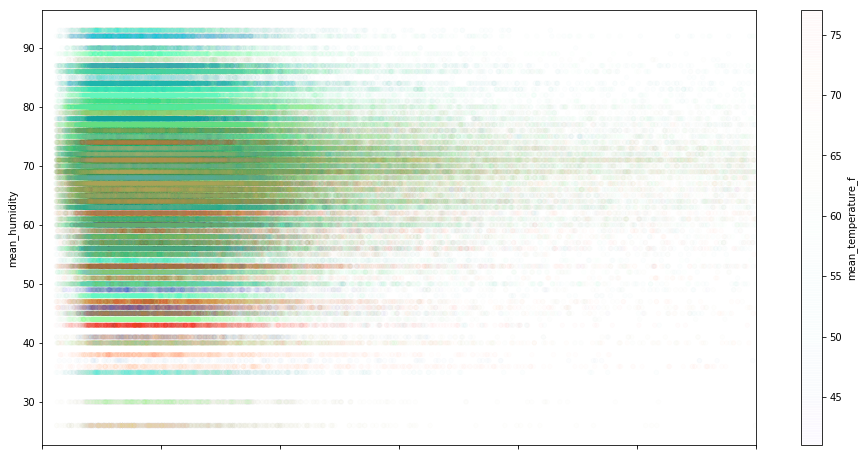

In [44]:
tmp.plot.scatter(x='duration', y='mean_humidity',\
                c='mean_temperature_f', colormap='rainbow', alpha=0.01,\
                figsize=(16,8), colorbar=True, xlim=(0,3000))

In [20]:
tmp.columns

Index([u'id', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code',
       u'date', u'max_temperature_f', u'mean_temperature_f',
       u'min_temperature_f', u'max_dew_point_f', u'mean_dew_point_f',
       u'min_dew_point_f', u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events',
       u'wind_dir_degrees'],
      dtype='object')

In [27]:
tmp.duration.describe()

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

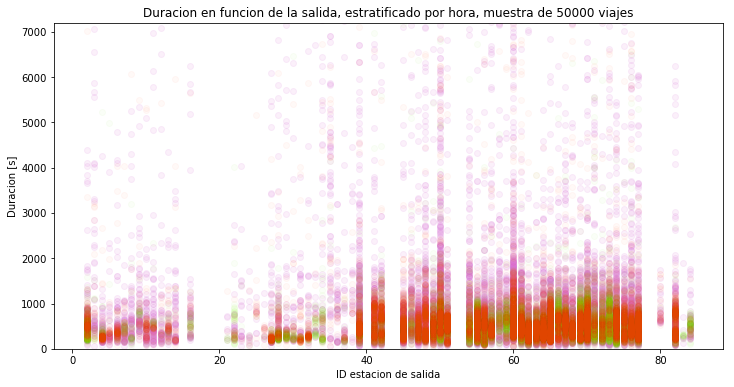

In [99]:
sample = trip.sample(50000)
plt.figure(figsize=(12,6))
plt.ylim(0,7200)
plt.scatter(x=sample.loc[sample.rush == 0,'start_station_id'], 
            y=sample.loc[sample.rush == 0,'duration'],\
            c='orchid', alpha=0.1)
plt.scatter(x=sample.loc[sample.rush == 1,'start_station_id'], 
            y=sample.loc[sample.rush == 1,'duration'],\
            c='lawngreen', alpha=0.03)
plt.scatter(x=sample.loc[sample.rush == 2,'start_station_id'], 
            y=sample.loc[sample.rush == 2,'duration'],\
            c='orangered', alpha=0.03)
plt.title("Duracion en funcion de la salida, estratificado por hora, muestra de 50000 viajes")
plt.xlabel("ID estacion de salida")
plt.ylabel("Duracion [s]")

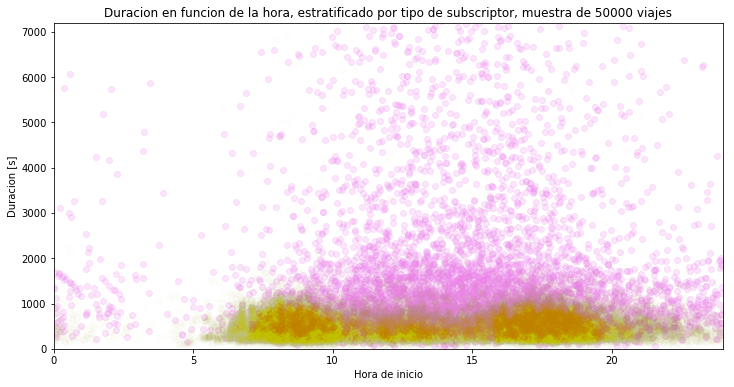

In [62]:
sample = tmp.sample(50000)
plt.figure(figsize=(12,6))
plt.xlim(0,24)
plt.ylim(0,7200)
plt.scatter(x=sample.loc[sample.subscription_type == "Customer",'hours_from_midnight'],\
            y=sample.loc[sample.subscription_type == "Customer",'duration'],\
            c='violet', alpha=0.2)
plt.scatter(x=sample.loc[sample.subscription_type == "Subscriber",'hours_from_midnight'],\
            y=sample.loc[sample.subscription_type == "Subscriber",'duration'],\
            c='y', alpha=0.01)
plt.title("Duracion en funcion de la hora, estratificado por tipo de subscriptor, muestra de 50000 viajes")
plt.xlabel("Hora de inicio")
plt.ylabel("Duracion [s]")

In [33]:
tmp.columns

Index([u'id', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code',
       u'start_time', u'hours_from_midnight', u'date', u'max_temperature_f',
       u'mean_temperature_f', u'min_temperature_f', u'max_dew_point_f',
       u'mean_dew_point_f', u'min_dew_point_f', u'max_humidity',
       u'mean_humidity', u'min_humidity', u'max_sea_level_pressure_inches',
       u'mean_sea_level_pressure_inches', u'min_sea_level_pressure_inches',
       u'max_visibility_miles', u'mean_visibility_miles',
       u'min_visibility_miles', u'max_wind_Speed_mph', u'mean_wind_speed_mph',
       u'max_gust_speed_mph', u'precipitation_inches', u'cloud_cover',
       u'events', u'wind_dir_degrees'],
      dtype='object')